In [1]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras import optimizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, GRU, TimeDistributed
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd
import random
import import_ipynb
import Sample_making

importing Jupyter notebook from Sample_making.ipynb


C:\Users\Mi Notebook\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
Tx = 5511
n_freq = 101

In [3]:
def save_model(model_name, model):
    
    save_dir = os.path.join(os.getcwd(), 'saved_models')

    if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
    model_path = os.path.join(save_dir, model_name)
    model.save(model_path)
    print('Save model and weights at %s ' % model_path)

    model_json = model.to_json()
    with open("model_json.json", "w") as json_file:
        json_file.write(model_json)

In [4]:
# conv1d + 
# batchnorm, relu, dropout + 
# gru, dropout, batchnorm + 
# gru, dropout, batchnorm, dropout + 
# dense, sigmoid

def model_1(input_shape):

    X_input = Input(shape = input_shape)
    
    X = Conv1D(filters=196,kernel_size=15,strides=4)(X_input)                           
    X = BatchNormalization()(X)                                 
    X = Activation('relu')(X)                                 
    X = Dropout(rate=0.8)(X)                                 

    X = GRU(units = 128, return_sequences=True)(X)            
    X = Dropout(0.8)(X)                                
    X = BatchNormalization()(X)                                  
    
    X = GRU(units = 128, return_sequences=True)(X)                                  
    X = Dropout(0.8)(X)                                 
    X = BatchNormalization()(X)                                 
    X = Dropout(0.8)(X)                                
    
    X = TimeDistributed(Dense(1, activation = "sigmoid"))(X) 

    model = Model(inputs = X_input, outputs = X)
    
    return model  

In [5]:
model_1 = model_1(input_shape = (Tx, n_freq))

In [6]:
model_1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5511, 101)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1375, 196)         297136    
_________________________________________________________________
batch_normalization (BatchNo (None, 1375, 196)         784       
_________________________________________________________________
activation (Activation)      (None, 1375, 196)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1375, 196)         0         
_________________________________________________________________
gru (GRU)                    (None, 1375, 128)         125184    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1375, 128)         0     

In [7]:
opt = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, decay=0.01)
model_1.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

In [10]:
save_model("Recurrent + 2GRU, 78 percent", model_1)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\Максим\Desktop\PavlodarCapture\SpotterWork\saved_models\Recurrent + 2GRU, 78 percent\assets
Save model and weights at C:\Users\Максим\Desktop\PavlodarCapture\SpotterWork\saved_models\Recurrent + 2GRU, 78 percent 


13/13 [==============================] - 11s 882ms/step - loss: 0.6086 - accuracy: 0.8167


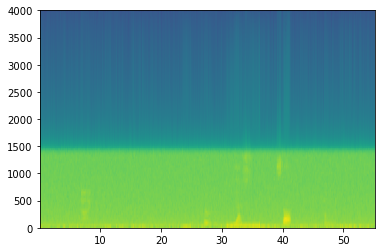

In [11]:
for i in range(0, 100):
    X, Y = Sample_making.make_batch_sample(64)
    model_1.fit(X, Y, batch_size = 5, epochs=1)